In [1]:
%cd /content/drive/My Drive/AA290

import numpy as np
import tensorflow as tf
import data 
import keras_model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

/content/drive/My Drive/AA290


In [ ]:
from tensorflow.keras.utils import plot_model


In [ ]:
import tensorflow_probability

In [ ]:
from tensorflow_probability import distributions

In [ ]:
tensorflow_probability.distributions.

In [29]:
dt=data.Dataset([-20,20],200,8,noisy=True,to_fix=1,n_epochs=1,random_pos=True,p_cycle=0,single_design=True,p_multipath=0,all_multipath=False,min_N=1)

In [ ]:
dt.compute_float()

In [ ]:
dt.

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
np.count_nonzero(np.max(np.abs(dt.N),axis=1))

80000

In [ ]:
np.count_nonzero(dt.N[:,0]==np.round(dt.x_float[:,0]))/len(dt.N)

In [ ]:
len(dt.N)

80000

In [ ]:
x_train,y_train=dt.prepare_data(False,True,False,False,False,False,False,False)
print(x_train.shape)
print(y_train.shape)

(29286, 56)
(29286, 7, 41)


In [ ]:
x_train[0]

In [ ]:
x_train[:,-3:]=x_train[:,-3:]/5000

In [ ]:
x_train[:,:14]=x_train[:,:14]/5000

In [ ]:
x_train[:,-1]=x_train[:,-1]/10

In [ ]:
x_train=x_train-np.min(x_train)+0.1
x_train=np.log(x_train)

In [ ]:
x_trainm=data.add_mult(x_train)

In [ ]:
x_trainmn=data.normalize(x_trainm)

In [ ]:
np.std(x_trainn,axis=0)

array([2.89879412e+00, 2.89466976e+00, 2.87236095e+00, 2.86901270e+00,
       2.88269994e+00, 2.90569104e+00, 2.88992211e+00, 2.89877018e+00,
       2.89469657e+00, 2.87234249e+00, 2.86902305e+00, 2.88273156e+00,
       2.90564752e+00, 2.88992693e+00, 3.92005522e+00, 3.93796227e+00,
       1.59946459e+00, 3.93412734e+00, 3.93227410e+00, 1.59714034e+00,
       3.92799704e+00, 3.92792177e+00, 1.60228320e+00, 3.92035554e+00,
       3.90667155e+00, 1.59507968e+00, 3.94537337e+00, 3.89535429e+00,
       1.59411505e+00, 3.93723800e+00, 3.91734571e+00, 1.59893626e+00,
       3.90220726e+00, 3.96098646e+00, 1.59017671e+00, 3.92004556e+00,
       3.93790879e+00, 1.59946372e+00, 3.93416130e+00, 3.93228838e+00,
       1.59713986e+00, 3.92798489e+00, 3.92791462e+00, 1.60227231e+00,
       3.92040642e+00, 3.90666124e+00, 1.59508374e+00, 3.94542224e+00,
       3.89535015e+00, 1.59412020e+00, 3.93725554e+00, 3.91729116e+00,
       1.59893816e+00, 3.90221561e+00, 3.96100700e+00, 1.59016758e+00,
      

In [ ]:
x_trainm[:,:35]=x_trainm[:,:35]/100
x_trainm[:,35:]=x_trainm[:,35:]/5000

In [ ]:
x_train[0,:14]-np.dot(x_train[0,14:-3].reshape(14,3),x_train[0,-3:])

In [ ]:
x_trainm[0].shape

In [ ]:
pca=PCA(n_components=150)
pca.fit(x_train1)
x_train_reduced=pca.transform(x_train1)
print(x_train_reduced.shape)

In [ ]:
pca.get_covariance()

In [3]:
x_train1,y_train1=dt.allinone(True,False)
x_train2,y_train2=dt.reg_test()
print(x_train1.shape)
print(y_train2.shape)

(17572, 163)
(17572, 10)


In [ ]:
#x_train3,y_train3=dt.prepare_lda_val()
y_train3=dt.detect_failure()

In [4]:
x_trainn=x_train1.copy()
x_trainn[:,:14]=x_train1[:,:14]/(2e2)
x_trainn[:,-45:]=x_train1[:,-45:]/5e2
x_trainn[:,-48:-45]=x_train1[:,-48:-45]/75
x_trainn[:,98:118]=x_train1[:,98:118]/2e2

#x_trainn[:,-46]=x_train1[:,-47]/50
y_trainn=y_train2.copy()
y_trainn[:,-3:]=y_train2[:,-3:]/75
#y_trainn[:,-1]=y_train2[:,-1]/50

In [ ]:
x_train,y_train=dt.conv_multiepoch()
x_train=x_train.reshape((x_train.shape[0],-1))
print(x_train.shape)
print(y_train.shape)

KeyboardInterrupt: ignored

In [ ]:
np.std(y_trainn,axis=0)

array([11.81954372, 11.89244213, 11.84480685, 11.79675837, 11.82659708,
       11.84722632, 11.796953  ,  1.99097662,  2.00194292,  2.00941127])

In [ ]:
xt=x_trainn[:int(0.9*len(x_trainn))]
yt=y_trainn[:int(0.9*len(x_trainn)),-3:]
xv=x_trainn[int(0.9*len(x_trainn)):]
yv=y_trainn[int(0.9*len(x_trainn)):,-3:]

In [ ]:
xt=x_train[:int(0.9*len(x_train))]
yt=dt.dx[:int(0.9*len(x_train))]/100
xv=x_train[int(0.9*len(x_train)):]
yv=dt.dx[int(0.9*len(x_train)):]/100

In [ ]:
reg_model=keras_model.FCModel_reg([1000,500,250],0,3,True,0.1)

In [ ]:
plot_model(reg_model)

In [ ]:
def scheduler(epoch, lr):
    if epoch < 200:
      return 1e-3
    elif epoch<400:
      return 1e-4
    elif epoch<800:
      return 1e-5
    return 1e-7
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history=reg_model.fit(xt,yt,batch_size=512,epochs=500,validation_data=(xv,yv),callbacks=[callback])

Epoch 1/500
52/52 [==============================] - 1s 15ms/step - loss: 0.7615 - val_loss: 0.4747
Epoch 2/500
52/52 [==============================] - 1s 12ms/step - loss: 0.5147 - val_loss: 0.3706
Epoch 3/500
52/52 [==============================] - 1s 13ms/step - loss: 0.4363 - val_loss: 0.2921
Epoch 4/500
52/52 [==============================] - 1s 13ms/step - loss: 0.3951 - val_loss: 0.2704
Epoch 5/500
52/52 [==============================] - 1s 13ms/step - loss: 0.3658 - val_loss: 0.2254
Epoch 6/500
52/52 [==============================] - 1s 12ms/step - loss: 0.3451 - val_loss: 0.1556
Epoch 7/500
52/52 [==============================] - 1s 13ms/step - loss: 0.3244 - val_loss: 0.1557
Epoch 8/500
52/52 [==============================] - 1s 13ms/step - loss: 0.3064 - val_loss: 0.1179
Epoch 9/500
52/52 [==============================] - 1s 12ms/step - loss: 0.2911 - val_loss: 0.0989
Epoch 10/500
52/52 [==============================] - 1s 13ms/step - loss: 0.2767 - val_loss: 0.1042

In [ ]:
pred=reg_model.predict(xv)

In [ ]:
y_train2[-1]

array([ -11.        ,  -18.        ,   -2.        ,    7.        ,
         -3.        ,  -15.        ,   20.        ,  208.25246497,
        173.81660327, -124.17266338])

In [ ]:
yv[-1]*50

array([-35.83929525,  55.86889939,  11.20618787])

In [ ]:
dt.x_float[-1]

array([ -12.52410316,  -19.18873119,   -8.30131245,    9.10892177,
         -4.67776203,  -13.39680576,   19.82054055,  209.33795553,
        172.55856204, -124.19082069])

In [ ]:
pred[-1]*100

array([-53.844196,  85.27084 ,  13.053058], dtype=float32)

In [ ]:
#print(np.mean(np.sum((dt.dx-dt.x_float[:,-3:])**2,axis=1)))
print(np.mean(np.sum((pred*100-yv*100)**2,axis=1)))

40.71708584562127


In [ ]:
x_train,y_train=dt.new_reg()
print(x_train.shape)
print(y_train.shape)

In [ ]:
reg_model2=keras_model.FCModel_reg2([600,600,600],(56,),7,True)

In [ ]:
def scheduler(epoch, lr):
    if epoch < 150:
      return 1e-3
    elif epoch<250:
      return 1e-4
    elif epoch<800:
      return 1e-5
    return 1e-7
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history=reg_model2.fit(x_train,y_train,batch_size=512,epochs=10,validation_split=0.1,callbacks=[callback])

In [ ]:
pred=reg_model2.predict(x_train)

In [ ]:
pred.shape

In [ ]:
#x_train,y_train=dt.semi_cheat(True,False,True)
x_train,y_train=dt.floatx_withy()
print(x_train.shape)
print(y_train.shape)

In [ ]:
np.std(x_trainn,axis=0)

In [ ]:
x_trainn=x_train
x_trainn[:,:7]=x_train[:,:7]/10
x_trainn[:,7:]=x_train[:,7:]/200

In [ ]:
x_trainn=x_train
x_trainn[:,:14]=x_train[:,:14]/(2.25*1e3)
x_trainn[:,14:14+7]=x_train[:,14:14+7]/10
x_trainn[:,14+7:]=x_train[:,14+7:]/200

In [ ]:
dt.N[0]

In [32]:
x_trainn,mean,std=data.normalize(x_train,[0,31,-1])
#x_trainn,mean,std=data.normalize(x_train1,[0,14,8*7,14*7,14*7+10,-1])

In [ ]:
x_train2,y_train2=dt.prepare_data(False)

In [ ]:
x_train[0,:3]

array([88.27703916, 23.62770004,  1.16205559])

In [ ]:
dt.dx[0]

array([88.42596606, 23.83861443,  0.74724756])

In [30]:
x_train,y_train=dt.all_float(True)
print(x_train.shape)
print(y_train.shape)

(8000, 107)
(8000, 7, 41)


In [31]:
y_train=np.zeros((x_train.shape[0],y_train.shape[1]))
y_train[np.arange(x_train.shape[0]),np.argmax(np.abs(dt.N),axis=1)]=1

In [ ]:
y_train=(dt.N!=0).astype('float')
print(y_train.shape)

(40100, 7)


In [ ]:
y_train[:10]

array([[0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0.]])

In [ ]:
x_train,y_train=dt.raim()

In [ ]:
x_train.shape

In [ ]:
x_train3[:,21:(21+14)]=x_train3[:,21:(21+14)]/10

In [ ]:
dt.N[:10]

In [ ]:
x_train[:,:28]=x_train[:,:28]/100
x_train[:,0:7*4:4]=x_train[:,0:7*4:4]*10
x_train[:,28:]=x_train[:,28:]*10000

In [ ]:
x_trainn=np.zeros_like(x_train)
x_trainn[:,:5*4]=x_train[:,:5*4]/100
x_trainn[:,0:5*4:4]=x_train[:,0:5*4:4]*10
x_trainn[:,5*4:]=x_train[:,5*4:]*10

In [ ]:
x_train[:,28:]=x_train[:,28:]*100

In [ ]:
np.std(x_trainn,axis=0)

array([2.89093227, 2.89097882, 2.90687031, 2.91362225, 2.91501192,
       2.89715087, 2.9080182 , 2.89093081, 2.89094326, 2.90683981,
       2.91366229, 2.91501593, 2.89716233, 2.9080338 , 3.91287153,
       3.93857369, 1.5834393 , 3.92812119, 3.97385251, 1.59216035,
       3.91404908, 3.93754876, 1.59830496, 3.94991502, 3.96622473,
       1.58290042, 3.92983224, 3.93920286, 1.58635634, 3.88864607,
       3.95360272, 1.57057814, 3.90329052, 3.92731535, 1.57716163,
       3.91283853, 3.93855132, 1.58344755, 3.9281932 , 3.97381344,
       1.59217202, 3.91402332, 3.93761594, 1.59832482, 3.94994252,
       3.96626416, 1.58290417, 3.92984021, 3.93922004, 1.58634548,
       3.88865843, 3.95359454, 1.57058043, 3.90331331, 3.92730374,
       1.57713383, 0.06499095, 0.06469391, 0.06375176, 0.06422123,
       0.06606247, 0.06470522, 0.06506502, 0.06382969, 0.06505861,
       0.06379418, 0.06463837, 0.06449814, 0.06345132, 0.06308996,
       0.15998898, 0.16196764, 0.16145522, 0.15907504, 0.16378

In [ ]:
k=x_train.shape[1]//7
x_train[:,0::k]=x_train[:,0::k]/100
x_train[:,1::k]=x_train[:,1::k]/100
x_train[:,2::k]=x_train[:,2::k]/100

In [ ]:
x_train4=data.add_mult(x_train3)
print(x_train4.shape)

In [ ]:
mo_model=keras_model.MO_model([],[800,800,800,600,600,600],21,1,(107,),True,False,6,'softmax')

In [ ]:
plot_model(mo_model)

In [ ]:
def scheduler(epoch, lr):
    if epoch < 300:
      return 1e-4
    elif epoch<400:
      return 1e-5
    elif epoch<500:
      return 1e-6
    elif epoch<600:
      return 1e-8
    return 1e-7
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
#history=mo_model.fit(x_trainn,y_train1[:,0,:],batch_size=1024,epochs=500,validation_split=0.05,callbacks=[callback],verbose=2)
history=mo_model.fit(x_trainn,y,batch_size=1024,epochs=600,validation_split=0.1,callbacks=[callback])
#history=mo_model.fit(x_train,[y_train[:,i,:] for i in range(y_train.shape[1])],batch_size=1024,epochs=500,validation_split=0.05,callbacks=[callback],verbose=2)

Epoch 1/600
36/36 [==============================] - 1s 20ms/step - loss: 85.6473 - acc: 0.0726 - val_loss: 83.5630 - val_acc: 0.0448
Epoch 2/600
36/36 [==============================] - 0s 12ms/step - loss: 81.6160 - acc: 0.1552 - val_loss: 79.9033 - val_acc: 0.0542
Epoch 3/600
36/36 [==============================] - 0s 12ms/step - loss: 77.7048 - acc: 0.2121 - val_loss: 76.2132 - val_acc: 0.0685
Epoch 4/600
36/36 [==============================] - 0s 12ms/step - loss: 73.8806 - acc: 0.2478 - val_loss: 72.5465 - val_acc: 0.0795
Epoch 5/600
36/36 [==============================] - 0s 13ms/step - loss: 70.1509 - acc: 0.2712 - val_loss: 68.9160 - val_acc: 0.1085
Epoch 6/600
36/36 [==============================] - 0s 12ms/step - loss: 66.5203 - acc: 0.2872 - val_loss: 65.3566 - val_acc: 0.1308
Epoch 7/600
36/36 [==============================] - 0s 13ms/step - loss: 63.0027 - acc: 0.2984 - val_loss: 61.8887 - val_acc: 0.1730
Epoch 8/600
36/36 [==============================] - 0s 12ms/s

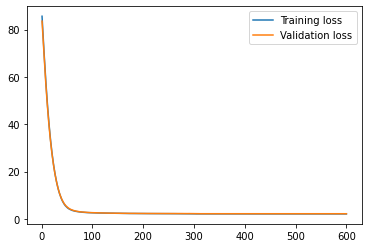

In [ ]:
name='double_8_loss.pdf'
plt.figure()
plt.plot(np.arange(len(history.history['loss']))+1,history.history['loss'])
plt.plot(np.arange(len(history.history['loss']))+1,history.history['val_loss'])
plt.legend(['Training loss','Validation loss'])
plt.savefig(name)
plt.show()

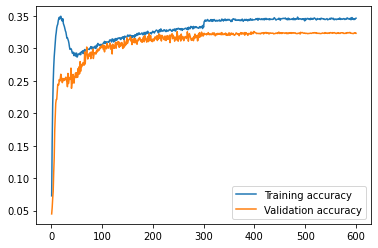

In [ ]:
name='double_8_acc.pdf'
plt.figure()
plt.plot(np.arange(len(history.history['loss']))+1,history.history['acc'])
plt.plot(np.arange(len(history.history['loss']))+1,history.history['val_acc'])
plt.legend(['Training accuracy','Validation accuracy'])
plt.savefig(name)
plt.show()

In [ ]:
plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(x_train[5,1:4*7:4],x_train[5,1:4*7:4],x_train[5,2:4*7:4])
#ax.scatter3D([dt.dx[5,0]],[dt.dx[5,1]],[dt.dx[5,2]])
plt.show()

In [ ]:
y=data.comb_y(dt.N)

In [ ]:
data.lda

0.19029367279836487

In [ ]:
dt.N[0]

array([ 0, 82,  0,  0,  0,  0,  0], dtype=int32)

In [ ]:
x_train[0,3::4]

array([-5.82798651e+00,  8.20800304e+01, -4.09583866e+01, -5.74461217e+01,
        2.60194926e+01, -1.38143300e+02,  1.96504414e+01,  3.14964396e-06,
        1.99351223e-07, -1.23362562e-06, -2.16542855e-06,  1.81955090e-04,
        4.78837760e-06, -6.09513740e-07,  2.84348171e-05,  1.20639616e-06,
        1.77163951e-04,  4.08375104e-06,  1.03139718e-06,  8.71286491e-06,
       -3.55200092e-06,  7.71900578e-04,  3.44948403e-06,  1.63801650e-05,
        1.25945188e-06, -3.35055141e-06])

In [ ]:
list(data.itertools.combinations([0,1,2],1))

[(0,), (1,), (2,)]

In [ ]:
pred=mo_model.predict(x_train)>0.5


In [ ]:
pred[:30]

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False,

In [ ]:
y_train[:5]

array([[0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0.]])

In [ ]:
prdes=np.argmax(pred>0.5,axis=1)==np.argmax(y_train,axis=1)

In [ ]:
prdes[20:40]

In [ ]:
dt.N[20:40]

In [ ]:
x_train[:,:6]/=10000

In [ ]:
lda_model=keras_model.FCModel_lda([50,50,50],True)

In [ ]:
def scheduler(epoch, lr):
    if epoch < 200:
      return 1e-3
    elif epoch<500:
      return 1e-5
    elif epoch<800:
      return 1e-5
    return 1e-7
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history=lda_model.fit(x_train,y_train,batch_size=512,epochs=300,validation_split=0.1,callbacks=[callback])

In [ ]:
x_train,y_train=dt.prepare_conv(True)
print(x_train.shape)
print(y_train.shape)

(29286, 7, 4, 2)
(29286, 7)


In [ ]:
np.std(x_train,axis=0)

In [ ]:
x_train,y_train=dt.conv_multiepoch(True,False)
print(x_train.shape)
print(y_train.shape)

In [ ]:
x_train2=x_train[:,:,:4,:]

In [ ]:
conv_model=keras_model.convMO_model([500,100],5,1,(7,4,2,),True)

In [ ]:
plot_model(conv_model)

In [ ]:
def scheduler(epoch, lr):
    if epoch < 200:
      return 1e-4
    elif epoch<400:
      return 1e-5
    elif epoch<800:
      return 1e-6
    return 1e-7
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history=conv_model.fit(x_train,y_train[:,0,:],batch_size=128,epochs=500,validation_split=0.05,callbacks=[callback])
#history=conv_model.fit(x_train,[y_train[:,i,:] for i in range(y_train.shape[1])],batch_size=2096,epochs=200,validation_split=0.05,callbacks=[callback])

Epoch 1/500
107/107 [==============================] - 1s 13ms/step - loss: 9.2136 - acc: 0.1980 - val_loss: 8.6395 - val_acc: 0.1874
Epoch 2/500
107/107 [==============================] - 1s 11ms/step - loss: 9.1154 - acc: 0.1955 - val_loss: 8.7437 - val_acc: 0.2000
Epoch 3/500
107/107 [==============================] - 1s 11ms/step - loss: 9.0232 - acc: 0.1945 - val_loss: 8.8434 - val_acc: 0.2028
Epoch 4/500
107/107 [==============================] - 1s 11ms/step - loss: 8.9474 - acc: 0.1945 - val_loss: 8.8875 - val_acc: 0.2000
Epoch 5/500
107/107 [==============================] - 1s 11ms/step - loss: 8.8901 - acc: 0.1950 - val_loss: 8.8794 - val_acc: 0.1902
Epoch 6/500
107/107 [==============================] - 1s 11ms/step - loss: 8.8392 - acc: 0.1972 - val_loss: 8.8539 - val_acc: 0.2042
Epoch 7/500
107/107 [==============================] - 1s 11ms/step - loss: 8.7945 - acc: 0.2009 - val_loss: 8.8253 - val_acc: 0.2000
Epoch 8/500
107/107 [==============================] - 1s 11ms

In [ ]:
conv_reg_model=keras_model.conv_reg([500],3)

In [ ]:
def scheduler(epoch, lr):
    if epoch < 200:
      return 1e-3
    elif epoch<500:
      return 1e-5
    elif epoch<800:
      return 1e-5
    return 1e-7
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history=conv_reg_model.fit(x_train,y_train2[:,-3]/100,batch_size=512,epochs=300,validation_split=0.05,callbacks=[callback])

Epoch 1/300
55/55 [==============================] - 0s 8ms/step - loss: 15.0389 - val_loss: 12.6841
Epoch 2/300
55/55 [==============================] - 0s 5ms/step - loss: 10.5661 - val_loss: 8.8730
Epoch 3/300
55/55 [==============================] - 0s 5ms/step - loss: 6.8663 - val_loss: 6.1607
Epoch 4/300
55/55 [==============================] - 0s 5ms/step - loss: 4.5582 - val_loss: 4.4352
Epoch 5/300
55/55 [==============================] - 0s 5ms/step - loss: 3.1548 - val_loss: 3.3529
Epoch 6/300
55/55 [==============================] - 0s 4ms/step - loss: 2.3335 - val_loss: 2.6593
Epoch 7/300
55/55 [==============================] - 0s 4ms/step - loss: 1.8014 - val_loss: 2.1610
Epoch 8/300
55/55 [==============================] - 0s 5ms/step - loss: 1.4541 - val_loss: 1.8357
Epoch 9/300
55/55 [==============================] - 0s 5ms/step - loss: 1.2233 - val_loss: 1.5214
Epoch 10/300
55/55 [==============================] - 0s 4ms/step - loss: 1.0900 - val_loss: 1.3400
Epoch 

In [ ]:
np.std(x_train)

2.888921460938066

Random forest test

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
clf=RandomForestClassifier(n_estimators=200,max_depth=25,n_jobs=-1)
x_rf=x_trainn[:int(0.8*len(x_trainn))]
#y_rf=dt.N[:int(0.8*len(x_trainn)),0]
y_rf=y_train[:int(0.8*len(x_trainn))]
x_val_rf=x_trainn[int(0.8*len(x_trainn)):]
#y_val_rf=dt.N[int(0.8*len(x_trainn)):]
y_val_rf=y_train[int(0.8*len(x_trainn)):]
y_rf=np.argmax(y_rf,axis=1)
y_val_rf=np.argmax(y_val_rf,axis=1)



In [35]:
y_rf[:10]

array([0, 1, 0, 0, 5, 1, 5, 4, 1, 2])

In [36]:
clf.fit(x_rf,y_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [37]:
pred=clf.predict(x_val_rf)

In [38]:
pred[:100]

array([5, 0, 4, 5, 2, 5, 1, 3, 0, 1, 1, 2, 0, 1, 6, 0, 3, 2, 1, 6, 5, 1,
       2, 2, 1, 5, 4, 3, 0, 1, 3, 4, 0, 6, 2, 6, 6, 3, 0, 4, 5, 3, 5, 2,
       2, 3, 5, 3, 0, 1, 4, 1, 3, 6, 2, 2, 4, 1, 2, 6, 1, 6, 1, 6, 2, 5,
       4, 0, 3, 3, 1, 4, 4, 6, 1, 3, 5, 5, 4, 3, 4, 1, 6, 5, 3, 1, 3, 4,
       2, 1, 6, 3, 2, 5, 1, 3, 5, 1, 1, 2])

In [ ]:
np.count_nonzero(y_val_rf)/len(y_val_rf)

In [39]:
clf.score(x_val_rf,y_val_rf)

0.73375

In [ ]:
1-np.count_nonzero(pred-y_val_rf)/pred.shape[0]/pred.shape[1]

In [5]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
reg=RandomForestRegressor(n_estimators=400,max_depth=30,min_samples_split=0.05)
x_rf=x_trainn[:int(0.8*len(x_trainn))]
y_rf=y_trainn[:int(0.8*len(x_trainn)),-3:]
x_val_rf=x_trainn[int(0.8*len(x_trainn)):]
y_val_rf=y_trainn[int(0.8*len(x_trainn)):,-3:]
reg.fit(x_rf,y_rf)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.05, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [13]:
pred=reg.predict(x_val_rf)

In [18]:
pred[10]*75

array([  89.26002778, -103.64419992,  -64.05316542])

In [19]:
y_val_rf[10]*75

array([149.56216914, -95.50239649, -54.85369943])

In [17]:
np.mean(np.sum((pred-y_val_rf)**2,axis=1))

62.08275801017267

In [ ]:
print(np.mean(np.sum((dt.dx-dt.x_float[:,-3:])**2,axis=1)))
print(np.mean(np.sum(((pred-y_val_rf)*np.array([200,200,50]))**2,axis=1)))